## What are the main characteristics which have the most impact on the car price?

## Table of Content

1. [Analyzing Individual Feature Patterns using Visualization](#chapter1) 
    1. [Numerical variables](#section_1_1)
    * [Categorical variables](#section_1_2)
* [Descriptive Statistical Analysis](#chapter2)
* [Grouping](#chapter3)
* [Correlation](#chapter4)
* [ANOVA](#chapter5)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Show max columns and rows from display options
pd.options.display.max_columns = None # None means no max value --- show all
pd.options.display.max_rows = None

In [4]:
cars = pd.read_csv('clean_automobile.csv')
print(cars.shape)
cars.head()

(201, 30)


,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


## 1. Analyzing Individual Feature Patterns using Visualization <a class="anchor" id="chapter1"></a>

### 1.1. Numerical variables <a class="anchor" id="section_1_1"></a>

In [5]:
# Correlation between price and other variables
cars.corr().loc[:,"price"].sort_values(ascending=False)

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.809729
highway-L/100km      0.801118
city-L/100km         0.789898
width                0.751265
length               0.690628
wheel-base           0.584642
bore                 0.543154
aspiration-turbo     0.179578
height               0.135486
normalized-losses    0.133999
diesel               0.110326
stroke               0.082267
compression-ratio    0.071107
symboling           -0.082391
peak-rpm            -0.101542
gas                 -0.110326
aspiration-std      -0.179578
city-mpg            -0.686571
Name: price, dtype: float64

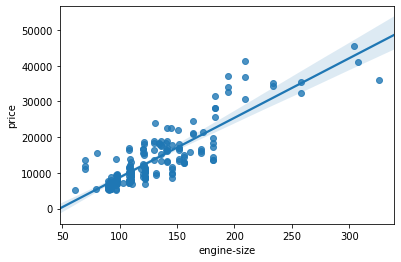

In [6]:
sns.regplot(x="engine-size", y="price", data=cars)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.    
The correlation between 'engine-size' and 'price' and see it's approximately 0.87

C:\Users\MX_1800\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


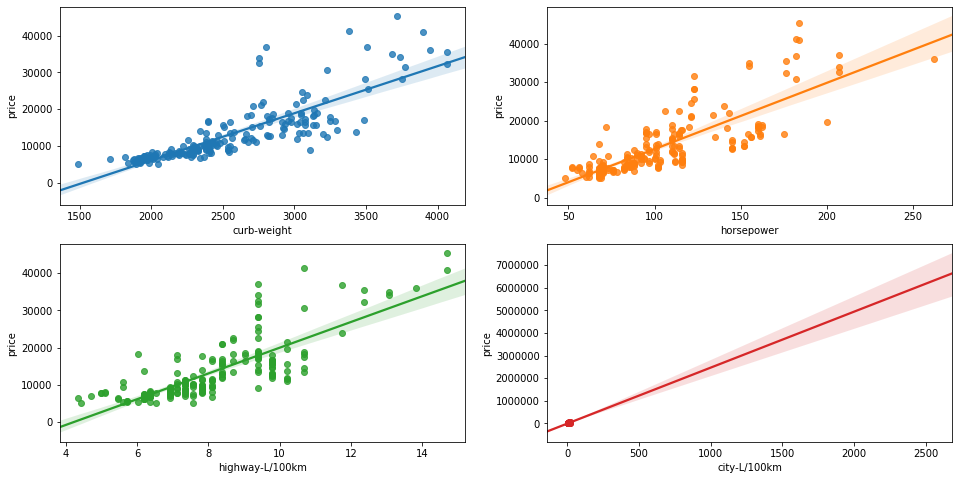

In [7]:
fig, ax =plt.subplots(2,2, figsize=(16, 8))

sns.regplot(x=cars["curb-weight"], y=cars["price"], ax=ax[0,0])
sns.regplot(x=cars["horsepower"], y=cars["price"], ax=ax[0,1])
sns.regplot(x=cars["highway-L/100km"], y=cars["price"], ax=ax[1,0])
sns.regplot(x=cars["city-L/100km"], y=cars["price"], ax=ax[1,1])

fig.show()

C:\Users\MX_1800\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


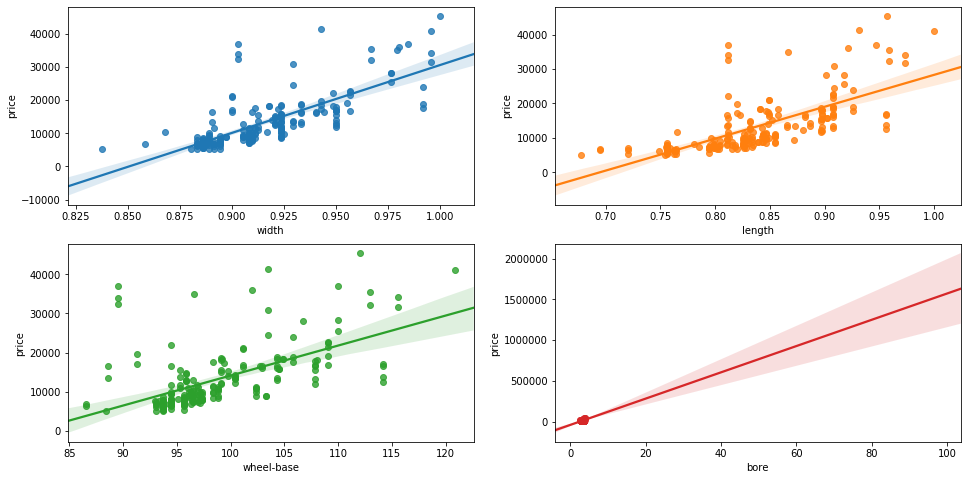

In [8]:
fig, ax =plt.subplots(2,2, figsize=(16, 8))

sns.regplot(x=cars["width"], y=cars["price"], ax=ax[0,0])
sns.regplot(x=cars["length"], y=cars["price"], ax=ax[0,1])
sns.regplot(x=cars["wheel-base"], y=cars["price"], ax=ax[1,0])
sns.regplot(x=cars["bore"], y=cars["price"], ax=ax[1,1])


fig.show()

### 1.2. Categorical variables <a class="anchor" id="section_1_2"></a>

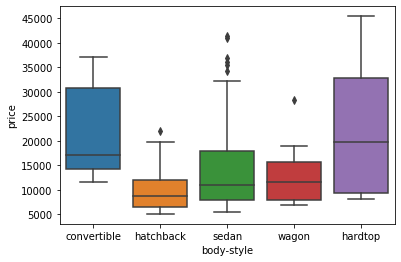

In [9]:
sns.boxplot(x=cars["body-style"], y=cars["price"])

We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":

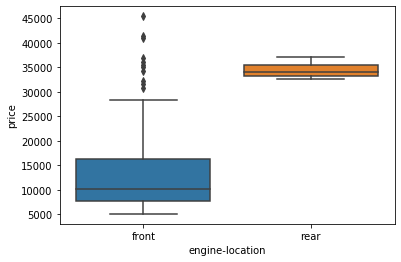

In [10]:
sns.boxplot(x=cars["engine-location"], y=cars["price"])

The distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

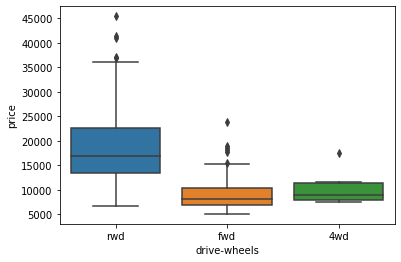

In [11]:
sns.boxplot(x=cars["drive-wheels"], y=cars["price"])

The distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.

## 2. Descriptive Statistical Analysis <a class="anchor" id="chapter2"></a>

In [12]:
cars.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,diesel,gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330711,3.256904,10.164279,103.393035,5117.587940,25.179104,8.044957,13207.129353,9.944145,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365623,478.113178,6.423220,1.840739,7947.066342,2.534599,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,7.833333,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


In [13]:
cars.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


In [14]:
cars['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [15]:
cars['engine-location'].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

## 3. Grouping <a class="anchor" id="chapter3"></a>

In [16]:
# Grouping 'drive-wheels','body-style' and 'price'
grp = cars[['drive-wheels','body-style','price']].groupby(['drive-wheels','body-style'],as_index=False).mean()
grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [17]:
grp_pivot = grp.pivot(index='drive-wheels',columns='body-style')
grp_pivot.fillna(0)

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

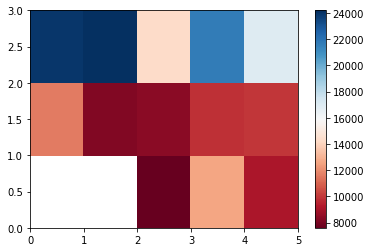

In [18]:
plt.pcolor(grp_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

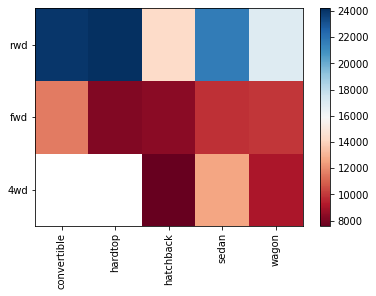

In [19]:
fig, ax = plt.subplots()
im = ax.pcolor(grp_pivot, cmap='RdBu')

#label names
row_labels = grp_pivot.columns.levels[1]
col_labels = grp_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grp_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grp_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## 4. Corelation <a class="anchor" id="chapter4"></a>

Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

- 1: Total positive linear correlation.
- 0: No linear correlation, the two variables most likely do not affect each other.
- -1: Total negative linear correlation.
      
Pearson Correlation is the default method of the function "corr". Like before we can calculate the Pearson Correlation of the of the 'int64' or 'float64' variables.

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

- p-value is  <  0.001: we say there is strong evidence that the correlation is significant.
- the p-value is  <  0.05: there is moderate evidence that the correlation is significant.
- the p-value is  <  0.1: there is weak evidence that the correlation is significant.
- the p-value is  >  0.1: there is no evidence that the correlation is significant.

Calculate the Pearson Correlation Coefficient and P-value
- engine-size          
- curb-weight          
- horsepower           
- highway-L/100km      
- city-L/100km        
- width                
- length               
- wheel-base           
- bore                 

In [20]:
from scipy import stats

In [21]:
for col in ['engine-size', 'curb-weight', 'horsepower', 'highway-L/100km', 'city-L/100km', 'width', 'length', 'wheel-base', 'bore']:
    pearson_coef, p_value = stats.pearsonr(cars[col], cars['price'])
    print(col, 'vs price')
    print("The Pearson Correlation Coefficient is", pearson_coef)
    print(" with a P-value of P =", p_value)
    print('-------------------------------------------------------')

engine-size vs price
The Pearson Correlation Coefficient is 0.8723351674455185
 with a P-value of P = 9.265491622198389e-64
-------------------------------------------------------
curb-weight vs price
The Pearson Correlation Coefficient is 0.8344145257702843
 with a P-value of P = 2.189577238894065e-53
-------------------------------------------------------
horsepower vs price
The Pearson Correlation Coefficient is 0.8097290352560287
 with a P-value of P = 5.924001027592835e-48
-------------------------------------------------------
highway-L/100km vs price
The Pearson Correlation Coefficient is 0.8011176263981975
 with a P-value of P = 3.046784581041283e-46
-------------------------------------------------------
city-L/100km vs price
The Pearson Correlation Coefficient is 0.7898975136626942
 with a P-value of P = 3.903106400939858e-44
-------------------------------------------------------
width vs price
The Pearson Correlation Coefficient is 0.7512653440522675
 with a P-value of P = 

- engine-size
    - p-value is  <  0.001, the correlation between engine-size and price is **statistically significant**
    - the linear relationship is **very strong** (~0.872)
- curb-weight
    - p-value is  <  0.001, the correlation between curb-weight and price is **statistically significant**
    - the linear relationship is **quite strong** (~0.834)
- Horsepower
    - p-value is  <  0.001, the correlation between horsepower and price is **statistically significant**
    - the linear relationship is **quite strong** (~0.809, close to 1)
- highway-L/100km
    - p-value is < 0.001, the correlation between highway-mpg and price is **statistically significant**
    - the coefficient of ~ -0.705 shows that the relationship is positive and **moderately strong**
- city-L/100km
    - p-value is  <  0.001, the correlation between city-mpg and price is statistically significant
    - the coefficient of ~ -0.687 shows that the relationship is positive and moderately strong
- width
    - p-value is < 0.001, the correlation between width and price is statistically significant
    - the linear relationship is quite strong (~0.751)
- length
    - p-value is  <  0.001, the correlation between length and price is statistically significant
    - the linear relationship is moderately strong (~0.691)
- wheel-base    
    - p-value is  <  0.001, the correlation between wheel-base and price is statistically significant
    - the linear relationship isn't extremely strong (~0.585)
- bore
    - p-value is  <  0.001, the correlation between bore and price is statistically significant
    - the linear relationship is only moderate (~0.521)

## 5. ANOVA <a class="anchor" id="chapter5"></a>

- The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

- F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

- P-value: P-value tells how statistically significant is our calculated score value.

- If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

Let's see if different types 'drive-wheels' impact 'price', we group the data.

In [22]:
grp_wheel = cars[['drive-wheels', 'price']].groupby(['drive-wheels'])
grp_wheel.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


##### Use get_group method to separate categories

In [23]:
grp_wheel.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [24]:
# use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value
# ANOVA
f_val, p_val = stats.f_oneway(grp_wheel.get_group('fwd')['price'], grp_wheel.get_group('rwd')['price'], grp_wheel.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

fwd and rwd

In [25]:
f_val, p_val = stats.f_oneway(grp_wheel.get_group('fwd')['price'], grp_wheel.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


4wd and rwd

In [26]:
f_val, p_val = stats.f_oneway(grp_wheel.get_group('4wd')['price'], grp_wheel.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


4wd and fwd

In [27]:
f_val, p_val = stats.f_oneway(grp_wheel.get_group('fwd')['price'], grp_wheel.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


##### Conclusion: Important Variables    
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-L/100km
- Highway-L/100km
- Wheel-base
- Bore

Categorical variables:

- Drive-wheels